In [196]:
import matplotlib.pyplot as plt
import keras
import numpy as np
import pandas as pd
import matplotlib
import glob
from sklearn.model_selection import train_test_split
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import preprocessing, layers, losses
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

In [197]:
df = pd.read_csv('./mortality_data.csv',parse_dates=['Clinic Date'])

In [198]:
df

,CHI,Diagnosis,Intervention,Medication,Clinic Date,Health Board,Gender,Mortality
0,1234561,congenital mitral stenosis suspected aortic co...,surgical mitral valvotomy - 1999 electrical ca...,"bisoprolol 5mg od, lisinopril 4mg od, warfarin...",2001-01-01,lanarkshire,M,0
1,2234562,moderately impaired dominant lv systolic funct...,pulmonary artery band 1997 bidirectional glenn...,warfarin thyroxine candesartan 20mg daily fluo...,2002-02-02,fife,M,1
2,3234563,previous persistent atrial tachycardia termina...,"modified right bt shunt, 3999 modified left bt...","warfarin, bisopropol 2mg od, levothyroxine 300...",2003-03-03,grampian,F,1
3,4244564,loeys-dietz syndrome tgfb ii variant dilated a...,None,losartan 15mg od increased today to 25mg od,2004-04-04,dumfries and galloway,F,0
4,5254565,coarctation of aorta patent ductus arteriosus ...,surgical repair of coarctation of the aorta & ...,"atorvastatin 40mgs od, cabdesartan 8mgs od, ch...",2005-05-05,highland,F,1
5,6634566,"presentation with sustained vt, non-inducible ...",probable surgical vsd closure age 3 years,bisoprolol 5mg daily,2006-06-06,ayrshire and arran,M,0


In [199]:
df_new = df[['Diagnosis', 'Intervention', 'Medication', 'Mortality']].copy()

In [234]:
df_new

,Diagnosis,Intervention,Medication,Mortality
0,congenital mitral stenosis suspected aortic co...,surgical mitral valvotomy - 1999 electrical ca...,"bisoprolol 5mg od, lisinopril 4mg od, warfarin...",0
1,moderately impaired dominant lv systolic funct...,pulmonary artery band 1997 bidirectional glenn...,warfarin thyroxine candesartan 20mg daily fluo...,1
2,previous persistent atrial tachycardia termina...,"modified right bt shunt, 3999 modified left bt...","warfarin, bisopropol 2mg od, levothyroxine 300...",1
3,loeys-dietz syndrome tgfb ii variant dilated a...,None,losartan 15mg od increased today to 25mg od,0
4,coarctation of aorta patent ductus arteriosus ...,surgical repair of coarctation of the aorta & ...,"atorvastatin 40mgs od, cabdesartan 8mgs od, ch...",1
5,"presentation with sustained vt, non-inducible ...",probable surgical vsd closure age 3 years,bisoprolol 5mg daily,0


In [235]:
# train = df_new.loc[0:3,['Diagnosis','Mortality']].copy()
# test = df_new.loc[4:6,['Diagnosis','Mortality']].copy()

In [254]:
X = df_new['Diagnosis'].copy()
y = df_new['Mortality'].copy()

# creating the feature matrix 
from sklearn.feature_extraction.text import CountVectorizer
matrix = CountVectorizer(max_features=1000)
X = matrix.fit_transform(X).toarray()

X_train, X_test, y_train, y_test = train_test_split(X,y,shuffle=False,test_size=0.1)

In [255]:
embedding_dim = 16
max_features = 10000
sequence_length = 250

model = tf.keras.Sequential([
  layers.Embedding(max_features + 1, embedding_dim),
  layers.Dense(16),
  layers.GlobalAveragePooling1D(),
  layers.Dense(8),
  layers.Dense(1)])
model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, None, 16)          160016    
_________________________________________________________________
dense_45 (Dense)             (None, None, 16)          272       
_________________________________________________________________
global_average_pooling1d_8 ( (None, 16)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_47 (Dense)             (None, 1)                 9         
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [256]:
model.compile(loss=losses.BinaryCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])

In [257]:
epochs = 10
history = model.fit(
    X_train,y_train,
    validation_split=0.2,
    epochs=epochs)

Train on 4 samples, validate on 1 samples
Epoch 1/10
4/4 [==============================] - 0s 108ms/sample - loss: 2.9428 - accuracy: 0.5000 - val_loss: 4.0155 - val_accuracy: 0.0000e+00
Epoch 2/10
4/4 [==============================] - 0s 3ms/sample - loss: 1.9177 - accuracy: 0.5000 - val_loss: 3.4521 - val_accuracy: 0.0000e+00
Epoch 3/10
4/4 [==============================] - 0s 4ms/sample - loss: 1.6798 - accuracy: 0.5000 - val_loss: 3.1477 - val_accuracy: 0.0000e+00
Epoch 4/10
4/4 [==============================] - 0s 4ms/sample - loss: 1.5472 - accuracy: 0.5000 - val_loss: 2.9431 - val_accuracy: 0.0000e+00
Epoch 5/10
4/4 [==============================] - 0s 5ms/sample - loss: 1.4575 - accuracy: 0.5000 - val_loss: 2.7912 - val_accuracy: 0.0000e+00
Epoch 6/10
4/4 [==============================] - 0s 4ms/sample - loss: 1.3908 - accuracy: 0.5000 - val_loss: 2.6715 - val_accuracy: 0.0000e+00
Epoch 7/10
4/4 [==============================] - 0s 4ms/sample - loss: 1.3385 - accuracy: 0

In [258]:
loss, accuracy = model.evaluate(X_test,y_test)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

Loss:  0.10582298040390015
Accuracy:  1.0


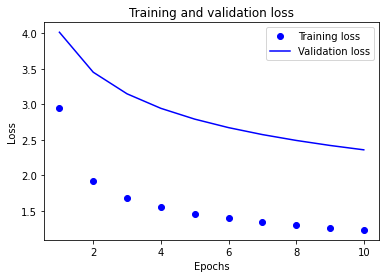

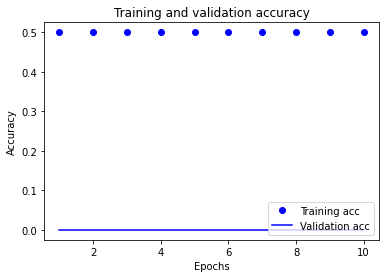

In [259]:
history_dict = history.history
history_dict.keys()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()